In [1]:
import numpy as np

## Homework 10
### Exercise 1

In [2]:
class MarkovChain(object):
    def __init__(self,transition_matrix,states):
        self.transition_matrix = np.atleast_2d(transition_matrix) # atleast_2d basically views the inputs as arrays of at least two dimensions
        # transition matrix is representing the probabalities of change of state in the Markov Chain
        self.states = states
        # states are basically the states of the Markov Chain.
        # iterating through the dictionaries 
        # the code is inspired a bit by the book and Medium's website regarding Markov states
        self.index_dict = {self.states[index]: index for index in range(len(self.states))} # making a dictionary that keeps track of the index of each self state
        self.state_dict = {index: self.states[index] for index in range(len(self.states))} # making a dictionary that basically saves each state  
    
    def currentState(self): # made an instance that basically returns the random current state only. However this is not compatible with the next_state which means that since
        # we are using the random.choice here the next time we call next_state the state is not going to be the same
        # I just wanted to add some instances that is why I made it here
        return np.random.choice(self.states)
    
    # a funny instance
    def avoid_bad_weather(self,current_state):
        if(current_state == "Snowy"): 
            return print("I cannot accept snow, I do not like it.")
        elif(current_state=="Rainy"):
            return print("Maybe Sunny would be better")
        elif(current_state == "Sunny"):
            return print("That's what I am talking about")
    
    def next_state(self,current_state):
        return np.random.choice(self.states,
                               p = self.transition_matrix[self.index_dict[current_state], :]) # returns the state of the random variable at the next instance
    # current_state is the same current state
    
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [3]:
transition_matrix = [[0.8, 0.19, 0.01],
                    [0.2,  0.7,  0.1],
                    [0.1,  0.2,  0.7]]

In [4]:
weather_chain = MarkovChain(transition_matrix=transition_matrix,
                                states=['Sunny', 'Rainy', 'Snowy'])

In [5]:
weather_chain.next_state(current_state='Sunny')

'Sunny'

In [6]:
weather_chain.next_state(current_state='Snowy')

'Rainy'

In [7]:
weather_chain.next_state(current_state='Rainy')

'Rainy'

In [8]:
weather_chain.generate_states(current_state='Snowy', no=10)

['Snowy',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Rainy',
 'Rainy']

In [9]:
weather_chain.currentState()

'Snowy'

In [10]:
weather_chain.avoid_bad_weather(current_state="Snowy")

I cannot accept snow, I do not like it.


In [11]:
weather_chain.avoid_bad_weather(current_state="Sunny")

That's what I am talking about


### Exercise 2

In [12]:
#
# Valuation of European call options in Black-Scholes-Merton Model
# incl. Vega function and implied volatility estimation
# -- class-based implementation
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
from math import log, sqrt, exp
from scipy import stats
class bsm_call_option(object):
    ''' Class for European call options in BSM model.
    Attributes
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term
    Methods
    =======
    value: float
        returns the present value of call option
    vega: float
        returns the Vega of call option
    imp_vol: float
        returns the implied volatility given option quote
    '''
    def __init__(self, S0, K, T, r, sigma): #define init 
        self.S0 = float(S0)
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
    def value(self): # define value for call and put
        ''' Returns option value.
        '''
        d1 = ((log(self.S0 / self.K) +
               (self.r + 0.5 * self.sigma ** 2) * self.T) /
              (self.sigma * sqrt(self.T)))
        d2 = ((log(self.S0 / self.K) +
               (self.r - 0.5 * self.sigma ** 2) * self.T) /
              (self.sigma * sqrt(self.T)))
        call = (self.S0 * stats.norm.cdf(d1, 0.0, 1.0) -
                 self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0))
        put = (self.K * exp(-self.r * self.T)* stats.norm.cdf(-d2,0.0,1.0) - self.S0 * stats.norm.cdf(-d1,0.0,1.0))
        return [call , put]
    
    def vega(self): # define vega
        ''' Returns Vega of option.
        '''
        d1 = ((log(self.S0 / self.K) +
               (self.r + 0.5 * self.sigma ** 2) * self.T) /
              (self.sigma * sqrt(self.T)))
        vega = self.S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(self.T)
        return vega
    def imp_vol(self, C0, sigma_est=0.2, it=100): #implied volatility
        ''' Returns implied volatility given option price.
        '''
        option = bsm_call_option(self.S0, self.K, self.T, self.r, sigma_est)
        for i in range(it):
            option.sigma -= (option.value() - C0) / option.vega()
        return option.sigma

In [13]:
bsm_option =  bsm_call_option(110,100,1/12,0.05,0.2)

In [14]:
bsm_option.value()

[10.520231873335234, 0.10443205784621945]

In [38]:
maturities = np.linspace(0.05,2.0,20)
strikes = np.linspace(80,100,120)
K,T = np.meshgrid(strikes,maturities)
C = np.zeros_like(K)
V = np.zeros_like(C)
for t in enumerate(maturities):
    for k in enumerate(strikes):
        bsm_option.T = t[1]
        bsm_option.K = k[1]
        C[t[0], k[0]] = bsm_option.value()[0]
        V[t[0], k[0]] = bsm_option.vega()
bsm_option.value()

[23.590140320450132, 4.073882124046065]

C:\Users\nicko\AppData\Local\Temp/ipykernel_28160/3037853991.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


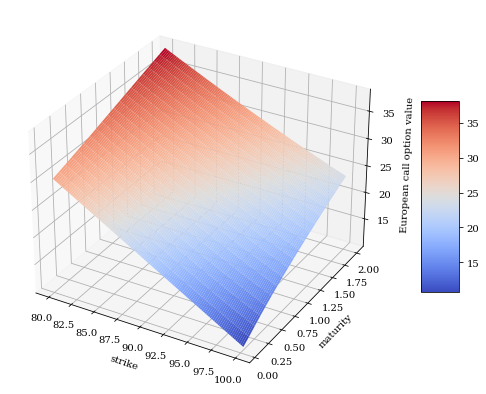

In [39]:
from pylab import cm, mpl, plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(K, T, C, rstride=1, cstride=1,
cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('European call option value')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Homework 11
### Exercise 1
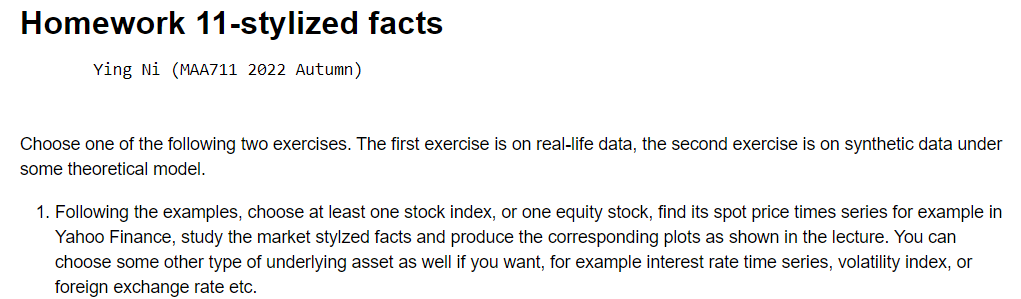

In [17]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
symbol = ['PFE']
pfizer_data = web.DataReader(symbol,'yahoo', start="2012-11-16", end="2022-12-12")['Adj Close']
pfizer_data = pd.DataFrame(pfizer_data)
pfizer_data.head()

Symbols,PFE
Date,
2012-11-16,15.826689
2012-11-19,16.012419
2012-11-20,16.105286
2012-11-21,16.151709
2012-11-23,16.271114


In [18]:
pfizer_data['LogReturns'] = np.log(pfizer_data / pfizer_data.shift(1))
pfizer_data.head()

Symbols,PFE,LogReturns
Date,,
2012-11-16,15.826689,NaN
2012-11-19,16.012419,0.011667
2012-11-20,16.105286,0.005783
2012-11-21,16.151709,0.002878
2012-11-23,16.271114,0.007366


In [19]:
pfizer_data = pfizer_data.dropna()
print(pfizer_data.tail())
import math
import scipy.stats as scs

Symbols           PFE  LogReturns
Date                             
2022-12-06  49.709999   -0.020311
2022-12-07  50.240002    0.010605
2022-12-08  51.779999    0.030192
2022-12-09  51.720001   -0.001159
2022-12-12  52.160000    0.008471


In [20]:
def print_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(data['LogReturns']))
    print("Mean of Annua. Log Returns %9.6f" %
          (np.mean(data['LogReturns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" %
          (np.std(data['LogReturns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['LogReturns']))
    print("Skew Normal Test p-value   %9.6f" %
          scs.skewtest(data['LogReturns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(data['LogReturns']))
    print("Kurt Normal Test p-value   %9.6f" %
          scs.kurtosistest(data['LogReturns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" %
          scs.normaltest(data['LogReturns'])[1])
    print("---------------------------------------------")  

In [21]:
print_statistics(pfizer_data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000471
Mean of Annua. Log Returns  0.118603
Std  of Annua. Log Returns  0.218346
---------------------------------------------
Skew of Sample Log Returns  0.164044
Skew Normal Test p-value    0.000782
---------------------------------------------
Kurt of Sample Log Returns  5.639948
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------


(15479.25, 19521.75, -0.08967922612481985, 0.11223243887881508)

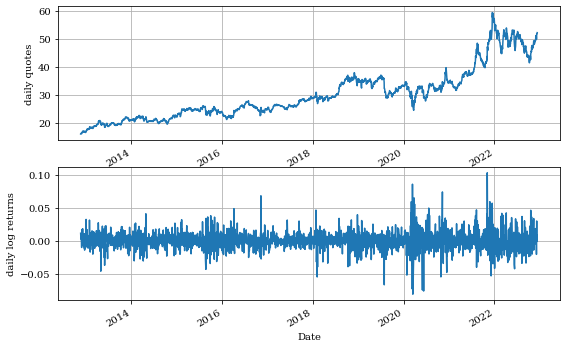

In [22]:
plt.figure(figsize=(9, 6))
plt.subplot(211)
pfizer_data['PFE'].plot() # spot prices
plt.ylabel('daily quotes')
plt.grid(True)
plt.axis('tight')

plt.subplot(212)
pfizer_data['LogReturns'].plot() # log returns
plt.ylabel('daily log returns')
plt.grid(True)
plt.axis('tight')

In [23]:
logReturnSquare = pfizer_data['LogReturns'] ** 2
logReturnSquare.head()

Date
2012-11-19    0.000136
2012-11-20    0.000033
2012-11-21    0.000008
2012-11-23    0.000054
2012-11-26    0.000003
Name: LogReturns, dtype: float64

In [24]:
# equialent to the above two cells
np.cumsum(pfizer_data['LogReturns'] ** 2).head()

Date
2012-11-19    0.000136
2012-11-20    0.000170
2012-11-21    0.000178
2012-11-23    0.000232
2012-11-26    0.000235
Name: LogReturns, dtype: float64

In [25]:
len(np.cumsum(pfizer_data['LogReturns'] ** 2))

2534

In [26]:
range = np.arange(len(pfizer_data))+1

In [27]:
## Realised variance
realizedVar = 252 * np.cumsum(pfizer_data['LogReturns'] ** 2) / (1+range)
pfizer_data['realizedVol'] = np.sqrt(realizedVar)
pfizer_data.head()

Symbols,PFE,LogReturns,realizedVol
Date,,,
2012-11-19,16.012419,0.011667,0.130961
2012-11-20,16.105286,0.005783,0.119344
2012-11-21,16.151709,0.002878,0.105850
2012-11-23,16.271114,0.007366,0.108156
2012-11-26,16.244576,-0.001632,0.099297


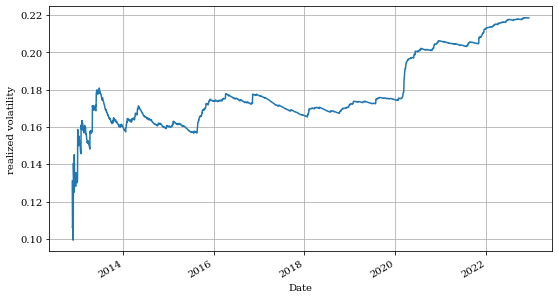

In [28]:
plt.figure(figsize=(9, 5))
pfizer_data['realizedVol'].plot()
plt.ylabel('realized volatility')
plt.grid(True)

In [29]:
print("Realized Volatility        %9.6f" % pfizer_data['realizedVol'].iloc[-1])

Realized Volatility         0.218431


## Rolling mean and rolling volatility

In [30]:
roll_mean = pfizer_data['LogReturns'].rolling(252).mean() * 252
roll_mean.tail()

Date
2022-12-06   -0.003027
2022-12-07    0.002927
2022-12-08    0.039326
2022-12-09    0.025024
2022-12-12    0.020144
Name: LogReturns, dtype: float64

In [31]:
roll_vol = pfizer_data['LogReturns'].rolling(252).std() * math.sqrt(252)
roll_vol.tail()

Date
2022-12-06    0.281161
2022-12-07    0.281323
2022-12-08    0.282866
2022-12-09    0.282568
2022-12-12    0.282380
Name: LogReturns, dtype: float64

In [32]:
roll_corr = roll_mean.rolling(252).corr(roll_vol) # rolling correlation

In [33]:
pfizer_data['roll_vol']= roll_vol; pfizer_data['roll_corr']= roll_corr
pfizer_data.tail()

Symbols,PFE,LogReturns,realizedVol,roll_vol,roll_corr
Date,,,,,
2022-12-06,49.709999,-0.020311,0.218353,0.281161,-0.635309
2022-12-07,50.240002,0.010605,0.218336,0.281323,-0.634841
2022-12-08,51.779999,0.030192,0.218500,0.282866,-0.639174
2022-12-09,51.720001,-0.001159,0.218457,0.282568,-0.641403
2022-12-12,52.160000,0.008471,0.218431,0.282380,-0.642494


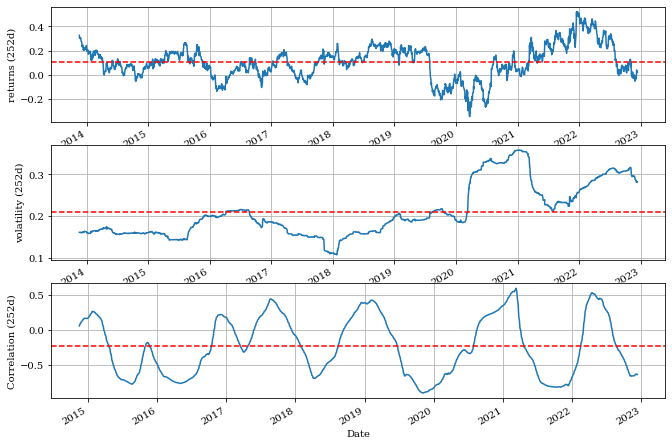

In [34]:
plt.figure(figsize=(11, 8))

plt.subplot(311)
roll_mean.plot()
plt.grid(True)
plt.ylabel('returns (252d)')
plt.axhline(roll_mean.mean(), color='r', ls='dashed', lw=1.5)

plt.subplot(312)
roll_vol.plot()  
plt.grid(True)
plt.ylabel('volatility (252d)')
plt.axhline(roll_vol.mean(), color='r', ls='dashed', lw=1.5)
  
plt.subplot(313)
roll_corr.plot()  
plt.grid(True)
plt.ylabel('Correlation (252d)')
plt.axhline(roll_corr.mean(), color='r', ls='dashed', lw=1.5)

## Histogram together with a normal density curve

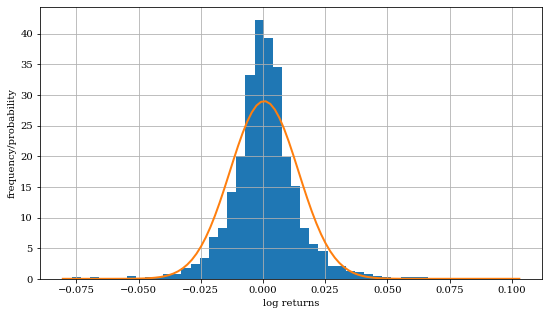

In [35]:
plt.figure(figsize=(9, 5))

x = np.linspace(min(pfizer_data['LogReturns']), max(pfizer_data['LogReturns']), 100)

plt.hist(np.array(pfizer_data['LogReturns']), density= True, bins=50)

# mean of our GBM returns
loc = np.mean(pfizer_data['LogReturns'])

# std dev of our GBM returns
scale = np.std(pfizer_data['LogReturns'])

# compute the value of a normal pdf with the same mean and std dev.
y = scs.norm.pdf(x, loc, scale) 
plt.plot(x, y, linewidth=2)
plt.xlabel('log returns')
plt.ylabel('frequency/probability')
plt.grid(True)

## QQ-plot

C:\Users\nicko\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'sample quantiles')

<Figure size 648x360 with 0 Axes>

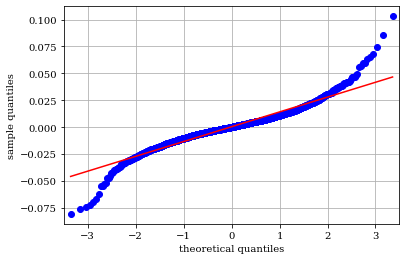

In [36]:
# Generates a Q-Q plot of the returns.
import statsmodels.api as sm
plt.figure(figsize=(9, 5))
sm.qqplot(pfizer_data['LogReturns'], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

## Count jumps

In [37]:
threshold = 0.05
jumps = np.sum(np.abs(pfizer_data['LogReturns']) > threshold)
jumps

21